<h1 style="font-size:42px; text-align:center; margin-bottom:30px;"><span style="color:SteelBlue">Module 5:</span> Model Training</h1>
<hr>

At last, it's time to build our models! 

It might seem like it took us a while to get here, but professional data scientists actually spend the bulk of their time on the 3 steps leading up to this one: 
* Exploratory Analysis
* Data Cleaning
* Feature Engineering

That's because the biggest jumps in model performance are from **better data**, not from fancier algorithms.

This is lengthy and action-packed module, so buckle up and let's dive right in!

<br><hr id="toc">

### In this module...

First, we'll load our analytical base table from Module 3. 

Then, we'll go through the essential modeling steps:

1. [Split your dataset](#split)
2. [Build model pipelines](#pipelines)
3. [Declare hyperparameters to tune](#hyperparameters)
4. [Fit and tune models with cross-validation](#fit-tune)
5. [Evaluate metrics and select winner](#evaluate)

Finally, we'll save the best model as a project deliverable!

<br><hr>

### First, let's import libraries, recruit models, and load the analytical base table.

Let's import our libraries and load the dataset. It's good practice to keep all of your library imports at the top of your notebook or program.

Before anything else, let's import the <code style="color:steelblue">print()</code> function from the future for compatability with Python 3.

In [1]:
from __future__ import print_function  # Compatability with Python 3
print( 'Print function ready to serve.' )

Print function ready to serve.


Next, let's import the libraries we'll need for this module.

In [2]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline 

# Seaborn for easier visualization
import seaborn as sns

# Scikit-Learn for Modeling
import sklearn

Next, let's import the 5 algorithms we introduced in Module 4.

In [3]:
# Import Elastic Net, Ridge Regression, and Lasso Regression
from sklearn.linear_model import ElasticNet, Ridge, Lasso

# Import Random Forest and Gradient Boosted Trees
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

<strong>Quick note about this module.</strong><br> In this module, we'll be relying heavily on Scikit-Learn, which has many helpful functions we can take advantage of. However, we won't import everything right away. Instead, we'll be importing each function from Scikit-Learn as we need it. That way, we can point out where you can find each function.


Next, let's load the analytical base table from Module 3.

In [4]:
# Load cleaned dataset from Module 3
df = pd.read_csv('project_files/analytical_base_table.csv')

print(df.shape)

(1882, 37)


<br id="split">
# 1. Split your dataset

Let's start with a crucial but sometimes overlooked step: **Spending** your data.

<br>
First, let's import the <code style="color:steelblue">train_test_split()</code> function from Scikit-Learn.

In [5]:
# Function for splitting training and test set
from sklearn.model_selection import train_test_split

Next, separate your dataframe into separate objects for the target variable (<code style="color:steelblue">y</code>) and the input features (<code style="color:steelblue">X</code>).

In [6]:
# Create separate object for target variable
y = df.tx_price
# Create separate object for input features
X = df.drop('tx_price', axis=1)

<br><hr style="border-color:royalblue;background-color:royalblue;height:1px;">
## <span style="color:RoyalBlue">Exercise 5.1</span>

**First, split <code style="color:steelblue">X</code> and <code style="color:steelblue">y</code> into training and test sets using the <code style="color:steelblue">train_test_split()</code> function.** 
* **Tip:** Its first two arguments should be X and y.
* **Pass in the argument <code style="color:steelblue">test_size=<span style="color:crimson">0.2</span></code> to set aside 20% of our observations for the test set.**
* **Pass in <code style="color:steelblue">random_state=<span style="color:crimson">1234</span></code> to set the random state for replicable results.**
* You can read more about this function in the <a href="http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html" target="_blank">documentation</a>.

The function returns a tuple with 4 elements: <code style="color:steelblue">(X_train, X_test, y_train, y_test)</code>. Remember, you can **unpack** it. We've given you a head-start below with the code to unpack the tuple:

In [7]:
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

Let's confirm we have the right number of observations in each subset.

<br>
**Next, run this code to confirm the size of each subset is correct.**

In [8]:
print( len(X_train), len(X_test), len(y_train), len(y_test) )

1505 377 1505 377


Next, when we train our models, we can fit them on the <code style="color:steelblue">X_train</code> feature values and <code style="color:steelblue">y_train</code> target values.

Finally, when we're ready to evaluate our models on our test set, we would use the trained models to predict <code style="color:steelblue">X_test</code> and evaluate the predictions against <code style="color:steelblue">y_test</code>.

<hr style="border-color:royalblue;background-color:royalblue;height:1px;">
<div style="text-align:center; margin: 40px 0 40px 0;">
[**Back to Contents**](#toc)
</div>

<br id="pipelines">
# 2. Build model pipelines

In Modules 1, 2, and 3, you explored the dataset, cleaned it, and engineered new features. However, sometimes we'll want to preprocess the training data even more before feeding it into our algorithms. 

<br>
First, let's show the summary statistics from our training data.

In [9]:
# Summary statistics of X_train
X_train.describe()

,beds,baths,sqft,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,exterior_walls_Brick,exterior_walls_Brick veneer,exterior_walls_Combination,exterior_walls_Metal,exterior_walls_Missing,exterior_walls_Other,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,roof_Asphalt,roof_Composition Shingle,roof_Composition Shingles,roof_Missing,roof_Other,roof_Shake Shingle,property_type_Apartment / Condo / Townhouse,property_type_Single-Family
count,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000
mean,3.423,2.582,2317.345,12414.493,0.874,40.508,4.559,5.142,5.373,41.242,3.430,23.587,16.072,38.575,69.007,64.932,467.595,140.826,6.485,2.793,0.367,0.027,0.054,0.068,0.118,0.036,0.264,0.066,0.071,0.635,0.019,0.183,0.060,0.031,0.425,0.575
std,1.064,0.930,1300.074,33937.256,0.332,47.005,4.527,8.534,7.516,53.662,4.672,25.894,17.759,6.520,19.578,17.146,231.362,72.957,1.998,0.507,0.482,0.163,0.227,0.251,0.323,0.186,0.441,0.248,0.257,0.482,0.138,0.387,0.238,0.174,0.495,0.495
min,1.000,1.000,500.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,22.000,11.000,5.000,88.000,30.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,3.000,2.000,1352.000,1575.000,1.000,7.000,1.000,0.000,0.000,7.000,0.000,4.000,5.000,33.000,59.000,53.000,323.000,96.000,5.000,3.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,3.000,3.000,1908.000,6050.000,1.000,23.000,3.000,2.000,3.000,22.000,2.000,15.000,10.000,38.000,73.000,66.000,427.000,127.000,7.000,3.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000
75%,4.000,3.000,3000.000,11761.000,1.000,58.000,7.000,6.000,7.000,51.000,5.000,35.000,21.000,43.000,84.000,78.000,573.000,171.000,8.000,3.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000
max,5.000,6.000,7594.000,436471.000,1.000,266.000,24.000,53.000,47.000,340.000,35.000,177.000,94.000,69.000,100.000,100.000,4508.000,1374.000,10.000,4.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


Next, standardize the training data manually, creating a new <code style="color:steelblue">X_train_new</code> object.

In [10]:
# Standardize X_train
X_train_new = (X_train - X_train.mean()) / X_train.std()

Let's look at the summary statistics for <code style="color:steelblue">X_train_new</code> to confirm standarization worked correctly.
* How can you tell?

In [11]:
# Summary statistics of X_train_new
X_train_new.describe()

,beds,baths,sqft,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,exterior_walls_Brick,exterior_walls_Brick veneer,exterior_walls_Combination,exterior_walls_Metal,exterior_walls_Missing,exterior_walls_Other,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,roof_Asphalt,roof_Composition Shingle,roof_Composition Shingles,roof_Missing,roof_Other,roof_Shake Shingle,property_type_Apartment / Condo / Townhouse,property_type_Single-Family
count,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000,1505.000
mean,0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-2.278,-1.700,-1.398,-0.366,-2.630,-0.862,-1.007,-0.603,-0.715,-0.769,-0.734,-0.911,-0.905,-2.542,-2.963,-3.495,-1.641,-1.519,-2.745,-3.533,-0.761,-0.167,-0.240,-0.270,-0.366,-0.193,-0.598,-0.265,-0.277,-1.317,-0.140,-0.474,-0.254,-0.179,-0.860,-1.162
25%,-0.398,-0.626,-0.743,-0.319,0.380,-0.713,-0.786,-0.603,-0.715,-0.638,-0.734,-0.756,-0.623,-0.855,-0.511,-0.696,-0.625,-0.614,-0.743,0.409,-0.761,-0.167,-0.240,-0.270,-0.366,-0.193,-0.598,-0.265,-0.277,-1.317,-0.140,-0.474,-0.254,-0.179,-0.860,-1.162
50%,-0.398,0.449,-0.315,-0.188,0.380,-0.372,-0.344,-0.368,-0.316,-0.359,-0.306,-0.332,-0.342,-0.088,0.204,0.062,-0.175,-0.190,0.258,0.409,-0.761,-0.167,-0.240,-0.270,-0.366,-0.193,-0.598,-0.265,-0.277,0.759,-0.140,-0.474,-0.254,-0.179,-0.860,0.860
75%,0.542,0.449,0.525,-0.019,0.380,0.372,0.539,0.101,0.217,0.182,0.336,0.441,0.277,0.679,0.766,0.762,0.456,0.414,0.758,0.409,1.314,-0.167,-0.240,-0.270,-0.366,-0.193,1.670,-0.265,-0.277,0.759,-0.140,-0.474,-0.254,-0.179,1.162,0.860
max,1.482,3.673,4.059,12.495,0.380,4.797,4.294,5.608,5.538,5.567,6.757,5.925,4.388,4.667,1.583,2.045,17.464,16.903,1.759,2.379,1.314,5.974,4.164,3.708,2.729,5.182,1.670,3.767,3.613,0.759,7.132,2.109,3.941,5.568,1.162,0.860


For the most part, we'll almost never perform manual standardization because we'll include preprocessing steps in **model pipelines**.

<br>
So let's import the <code style="color:steelblue">make_pipeline()</code> function from Scikit-Learn.

In [12]:
# Function for creating model pipelines
from sklearn.pipeline import make_pipeline

Now let's import the <code style="color:steelblue">StandardScaler</code>, which is used for standardization.

In [13]:
# For standardization
from sklearn.preprocessing import StandardScaler

Next, create a <code style="color:steelblue">pipelines</code> dictionary.
* It should include 3 keys: <code style="color:crimson">'lasso'</code>, <code style="color:crimson">'ridge'</code>, and <code style="color:crimson">'enet'</code>
* The corresponding values should be pipelines that first standardize the data.
* For the algorithm in each pipeline, set <code style="color:steelblue">random_state=<span style="color:crimson">123</span></code> to ensure replicable results.

In [14]:
# Create pipelines dictionary
pipeline_dict = { 'lasso' : make_pipeline(StandardScaler(), Lasso(random_state=123)),
                 'ridge' : make_pipeline(StandardScaler(), Ridge(random_state=123)),
                 'enet' : make_pipeline(StandardScaler(), ElasticNet(random_state=123)) }

In the next exercise, you'll add pipelines for tree ensembles.

<hr style="border-color:royalblue;background-color:royalblue;height:1px;">
## <span style="color:RoyalBlue">Exercise 5.2</span>

**Add pipelines for <code style="color:SteelBlue">RandomForestRegressor</code> and <code style="color:SteelBlue">GradientBoostingRegressor</code> to your pipeline dictionary.**
* Name them <code style="color:crimson">'rf'</code> for random forest and <code style="color:crimson">'gb'</code> for gradient boosted tree.
* Both pipelines should standardize the data first.
* For both, set <code style="color:steelblue">random_state=<span style="color:crimson">123</span></code> to ensure replicable results.

In [15]:
# Add a pipeline for 'rf'
pipeline_dict['rf'] = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=123))
# Add a pipeline for 'gb'
pipeline_dict['gb'] = make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state=123))

Let's make sure our dictionary has pipelines for each of our algorithms.

<br>
**Run this code to confirm that you have all 5 algorithms, each part of a pipeline.**

In [16]:
# Check that we have all 5 algorithms, and that they are all pipelines
for key, value in pipeline_dict.items():
    print( key, type(value) )

enet <class 'sklearn.pipeline.Pipeline'>
gb <class 'sklearn.pipeline.Pipeline'>
ridge <class 'sklearn.pipeline.Pipeline'>
rf <class 'sklearn.pipeline.Pipeline'>
lasso <class 'sklearn.pipeline.Pipeline'>


Now that we have our pipelines, we're ready to move on to declaring hyperparameters to tune.

<hr style="border-color:royalblue;background-color:royalblue;height:1px;">

<div style="text-align:center; margin: 40px 0 40px 0;">
[**Back to Contents**](#toc)
</div>


<br id="hyperparameters">
# 3. Declare hyperparameters to tune

Up to now, we've been casually talking about "tuning" models, but now it's time to treat the topic more formally.

<br>
First, list all the tunable hyperparameters for your Lasso regression pipeline.

In [17]:
# List tuneable hyperparameters of our Lasso pipeline
pipeline_dict['lasso'].get_params()

{'lasso': Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
    normalize=False, positive=False, precompute=False, random_state=123,
    selection='cyclic', tol=0.0001, warm_start=False),
 'lasso__alpha': 1.0,
 'lasso__copy_X': True,
 'lasso__fit_intercept': True,
 'lasso__max_iter': 1000,
 'lasso__normalize': False,
 'lasso__positive': False,
 'lasso__precompute': False,
 'lasso__random_state': 123,
 'lasso__selection': 'cyclic',
 'lasso__tol': 0.0001,
 'lasso__warm_start': False,
 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'steps': [('standardscaler',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('lasso', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=123,
      selection='cyclic', tol=0.0001, warm_start=False))]}

Next, declare hyperparameters to tune for Lasso and Ridge regression.
* Try values between 0.001 and 10 for <code style="color:steelblue">alpha</code>.

In [18]:
# Lasso hyperparameters
lasso_hyperparameters = { 'lasso__alpha' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10] }

# Ridge hyperparameters 
ridge_hyperparameters = { 'ridge__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10] }

Now declare a hyperparameter grid fo Elastic-Net.
* You should tune the <code style="color:steelblue">l1_ratio</code> in addition to <code style="color:steelblue">alpha</code>.

In [19]:
# Elastic Net hyperparameters
enet_hyperparameters = { 'elasticnet__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10], 
                       'elasticnet__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]}

<br><hr style="border-color:royalblue;background-color:royalblue;height:1px;">
## <span style="color:RoyalBlue">Exercise 5.3</span>

Let's start by declaring the hyperparameter grid for our random forest.

<br>
**Declare a hyperparameter grid for <code style="color:SteelBlue">RandomForestRegressor</code>.**
* Name it <code style="color:steelblue">rf_hyperparameters</code>

* Set <code style="color:steelblue"><span style="color:crimson">'randomforestregressor\__n_estimators'</span>: [100, 200]</code>
* Set <code style="color:steelblue"><span style="color:crimson">'randomforestregressor\__max_features'</span>: ['auto', 'sqrt', 0.33]</code>

In [20]:
# Random forest hyperparameters
rf_hyperparameters = { 
    'randomforestregressor__n_estimators' : [100, 200],
    'randomforestregressor__max_features': ['auto', 'sqrt', 0.33],
}

Next, let's declare settings to try for our boosted tree.

<br>
**Declare a hyperparameter grid for <code style="color:SteelBlue">GradientBoostingRegressor</code>.**
* Name it <code style="color:steelblue">gb_hyperparameters</code>.
* Set <code style="color:steelblue"><span style="color:crimson">'gradientboostingregressor\__n_estimators'</span>: [100, 200]</code>
* Set <code style="color:steelblue"><span style="color:crimson">'gradientboostingregressor\__learning_rate'</span>: [0.05, 0.1, 0.2]</code>
* Set <code style="color:steelblue"><span style="color:crimson">'gradientboostingregressor\__max_depth'</span>: [1, 3, 5]</code>

In [21]:
# Boosted tree hyperparameters
gb_hyperparameters = { 'gradientboostingregressor__n_estimators': [100, 200],
                     'gradientboostingregressor__learning_rate': [0.05, 0.1, 0.2],
                     'gradientboostingregressor__max_depth': [1, 3, 5]}

Now that we have all of our hyperparameters declared, let's store them in a dictionary for ease of access.

<br>
**Create a <code style="color:steelblue">hyperparameters</code> dictionary**.
* Use the same keys as in the <code style="color:steelblue">pipelines</code> dictionary.
    * If you forgot what those keys were, you can insert a new code cell and call <code style="color:steelblue">pipelines.keys()</code> for a reminder.
* Set the values to the corresponding **hyperparameter grids** we've been declaring throughout this module.
    * e.g. <code style="color:steelblue"><span style="color:crimson">'rf'</span> : rf_hyperparameters</code>
    * e.g. <code style="color:steelblue"><span style="color:crimson">'lasso'</span> : lasso_hyperparameters</code>

In [22]:
# Create hyperparameters dictionary
hyperparameters = {
    'rf' : rf_hyperparameters,
    'gb' : gb_hyperparameters,
    'lasso' : lasso_hyperparameters,
    'ridge' : ridge_hyperparameters,
    'enet' : enet_hyperparameters
}

**Finally, run this code to check that <code style="color:steelblue">hyperparameters</code> is set up correctly.**

In [23]:
for key in ['enet', 'gb', 'ridge', 'rf', 'lasso']:
    if key in hyperparameters:
        if type(hyperparameters[key]) is dict:
            print( key, 'was found in hyperparameters, and it is a grid.' )
        else:
            print( key, 'was found in hyperparameters, but it is not a grid.' )
    else:
        print( key, 'was not found in hyperparameters')

enet was found in hyperparameters, and it is a grid.
gb was found in hyperparameters, and it is a grid.
ridge was found in hyperparameters, and it is a grid.
rf was found in hyperparameters, and it is a grid.
lasso was found in hyperparameters, and it is a grid.


<hr style="border-color:royalblue;background-color:royalblue;height:1px;">
<div style="text-align:center; margin: 40px 0 40px 0;">
[**Back to Contents**](#toc)
</div>

<br id="fit-tune">
# 4. Fit and tune models with cross-validation

Now that we have our <code style="color:steelblue">pipelines</code> and <code style="color:steelblue">hyperparameters</code> dictionaries declared, we're ready to tune our models with cross-validation.

<br>
First, let's to import a helper for cross-validation called <code style="color:steelblue">GridSearchCV</code>.

In [24]:
# Helper for cross-validation
from sklearn.model_selection import GridSearchCV

Next, to see an example, set up cross-validation for Lasso regression.

In [25]:
# Create cross-validation object from Lasso pipeline and Lasso hyperparameters
model = GridSearchCV(pipeline_dict['lasso'], hyperparameters['lasso'], cv=10, n_jobs=-1)

Pass <code style="color:steelblue">X_train</code> and <code style="color:steelblue">y_train</code> into the <code style="color:steelblue">.fit()</code> function to tune hyperparameters.

In [26]:
# Fit and tune model
model.fit(X_train, y_train)

/Users/jfrank/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jfrank/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jfrank/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jfrank/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not co

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lasso', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=123,
   selection='cyclic', tol=0.0001, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'lasso__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

By the way, don't worry if you get the message:

<pre style="color:crimson">ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations</pre>

We'll dive into some of the under-the-hood nuances later.

<br>
In the next exercise, we'll write a loop that tunes all of our models.

<br><hr style="border-color:royalblue;background-color:royalblue;height:1px;">
## <span style="color:RoyalBlue">Exercise 5.4</span>

**Create a dictionary of models named <code style="color:SteelBlue">fitted_models</code> that have been tuned using cross-validation.**
* The keys should be the same as those in the <code style="color:SteelBlue">pipelines</code> and <code style="color:SteelBlue">hyperparameters</code> dictionaries. 
* The values should be <code style="color:steelblue">GridSearchCV</code> objects that have been fitted to <code style="color:steelblue">X_train</code> and <code style="color:steelblue">y_train</code>.
* After fitting each model, print <code style="color:crimson">'{name} has been fitted.'</code> just to track the progress.
* **Tip:** We've started you off with some code.

This step can take a few minutes, so please be patient.

In [27]:
# Create empty dictionary called fitted_models
fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipeline_dict.items():
    # Create cross-validation object from pipeline and hyperparameters
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    
    # Fit model on X_train, y_train
    model.fit(X_train, y_train)
    
    # Store model in fitted_models[name] 
    fitted_models[name] = model
    
    # Print '{name} has been fitted'
    print(name, 'has been fitted.')

enet has been fitted.
gb has been fitted.
ridge has been fitted.
rf has been fitted.
lasso has been fitted.


<br>
**Run this code to check that the models are of the correct type.**

In [28]:
# Check that we have 5 cross-validation objects
for key, value in fitted_models.items():
    print( key, type(value) )

enet <class 'sklearn.model_selection._search.GridSearchCV'>
lasso <class 'sklearn.model_selection._search.GridSearchCV'>
ridge <class 'sklearn.model_selection._search.GridSearchCV'>
gb <class 'sklearn.model_selection._search.GridSearchCV'>
rf <class 'sklearn.model_selection._search.GridSearchCV'>


<br>
**Finally, run this code to check that the models have been fitted correctly.**

In [29]:
from sklearn.exceptions import NotFittedError

for name, model in fitted_models.items():
    try:
        pred = model.predict(X_test)
        print(name, 'has been fitted.')
    except NotFittedError as e:
        print(repr(e))

enet has been fitted.
lasso has been fitted.
ridge has been fitted.
gb has been fitted.
rf has been fitted.


Nice. Now we're ready to evaluate how our models performed!

<hr style="border-color:royalblue;background-color:royalblue;height:1px;">

<div style="text-align:center; margin: 40px 0 40px 0;">
[**Back to Contents**](#toc)
</div>

<br id="evaluate">
# 5. Evaluate models and select winner

Finally, it's time to evaluate our models and pick the best one.

<br>
Let's display the holdout $R^2$ score for each fitted model.

In [30]:
# Display best_score_ for each fitted model
for name, model in fitted_models.items():
    print(name, model.best_score_)

enet 0.338397466448
lasso 0.317207520028
ridge 0.32218100854
gb 0.474533787809
rf 0.455778612248


Here's what you should see:

    enet 0.342759786956
    lasso 0.309321321129
    ridge 0.316805719351
    gb 0.48873808731
    rf 0.480576134721


If you get different numbers, check to see if you've set the <code style="color:steelblue">random_state=</code> correctly for each of the models.

Next, import the <code style="color:steelblue">r2_score()</code> and <code style="color:steelblue">mean_absolute_error()</code> functions.

In [35]:
# Import r2_score and mean_absolute_error functions
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_absolute_error

Finally, let's see how the fitted models perform on our test set!

<br>
First, access your fitted random forest and display the object.

In [36]:
# Display fitted random forest object
fitted_models['rf']

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestregressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=123,
           verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'randomforestregressor__n_estimators': [100, 200], 'randomforestregressor__max_features': ['auto', 'sqrt', 0.33]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

Predict the test set using the fitted random forest.

In [37]:
# Predict test set using fitted random forest
pred = fitted_models['rf'].predict(X_test)

Finally, we use the scoring functions we imported to calculate and print $R^2$ and MAE.

In [38]:
# Calculate and print R^2 and MAE
print('R^2: ', r2_score(y_test, pred))
print('MAE: ', mean_absolute_error(y_test, pred))

R^2:  0.462360977693
MAE:  79599.2885411


In the next exercise, we'll evaluate all of our fitted models on the test set and pick the winner.

<br><hr style="border-color:royalblue;background-color:royalblue;height:1px;">
## <span style="color:RoyalBlue">Exercise 5.5</span>

**Use a <code style="color:SteelBlue">for</code> loop, print the performance of each model in <code style="color:SteelBlue">fitted_models</code> on the test set.**
* Print both <code style="color:SteelBlue">r2_score</code> and <code style="color:SteelBlue">mean_absolute_error</code>.
* Those functions each take two arguments:
    * The actual values for your target variable (<code style="color:SteelBlue">y_test</code>)
    * Predicted values for your target variable
* Label the output with the name of the algorithm. For example:

<pre style="color:crimson">
lasso
--------
R^2: 0.409313458932
MAE: 84963.5598922
</pre>

In [40]:
# Code here
for name, model in fitted_models.items(): 
    pred_var = model.predict(X_test)
    print(name)
    print('-------')
    print('R^2: ', r2_score(y_test, pred_var))
    print('MAE: ', mean_absolute_error(y_test, pred_var))
    

enet
-------
R^2:  0.326823052363
MAE:  94186.9415534
lasso
-------
R^2:  0.318413645016
MAE:  93345.5945611
ridge
-------
R^2:  0.319495558755
MAE:  93273.7711398
gb
-------
R^2:  0.432899100508
MAE:  82212.9109448
rf
-------
R^2:  0.462360977693
MAE:  79599.2885411


**Next, ask yourself these questions to pick the winning model:**
* Which model had the highest $R^2$ on the test set?

> Random forest

* Which model had the lowest mean absolute error?

> Random forest

* Are these two models the same one?

> Yes

* Did it also have the best holdout $R^2$ score from cross-validation?

> Yes

* **Does it satisfy our win condition?**

> Yes, its mean absolute error is less than \$70,000!

**Finally, let's plot the performance of the winning model on the test set. Run the code below.**
* It first plots a scatter plot.
* Then, it plots predicted transaction price on the X-axis.
* Finally, it plots actual transaction price on the y-axis.

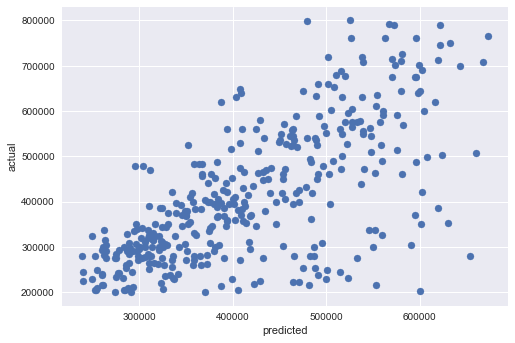

In [41]:
gb_pred = fitted_models['rf'].predict(X_test)
plt.scatter(gb_pred, y_test)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

This last visual check is a nice way to confirm our model's performance.
* Are the points scattered around the 45 degree diagonal?

<br>
<hr style="border-color:royalblue;background-color:royalblue;height:1px;">

<div style="text-align:center; margin: 40px 0 40px 0;">
[**Back to Contents**](#toc)
</div>

<br>
### Finally, let's save the winning model.

Great job! You've created a pretty kick-ass model for real-estate valuation. Now it's time to save your hard work.

First, let's take a look at the data type of your winning model.

***Run each code cell below after completing the exercises above.***

In [42]:
type(fitted_models['rf'])

sklearn.model_selection._search.GridSearchCV

It looks like this is still the <code style="color:steelblue">GridSearchCV</code> data type. 
* You can actually directly save this object if you want, because it will use the winning model pipeline by default. 
* However, what we really care about is the actual winning model <code style="color:steelblue">Pipeline</code>, right?

In that case, we can use the <code style="color:steelblue">best\_estimator_</code> method to access it:

In [43]:
type(fitted_models['rf'].best_estimator_)

sklearn.pipeline.Pipeline

If we output that object directly, we can also see the winning values for our hyperparameters.

In [45]:
fitted_models['rf'].best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestregressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.33, max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=123,
           verbose=0, warm_start=False))])

See? The winning values for our hyperparameters are:
* <code style="color:steelblue">n_estimators: <span style="color:crimson">200</span></code>
* <code style="color:steelblue">max_features : <span style="color:crimson">'auto'</span></code>

Great, now let's import a helpful package called <code style="color:steelblue">pickle</code>, which saves Python objects to disk.

In [ ]:
import pickle

Let's save the winning <code style="color:steelblue">Pipeline</code> object into a pickle file.

In [ ]:
with open('final_model.pkl', 'wb') as f:
    pickle.dump(fitted_models['rf'].best_estimator_, f)

Congratulations... you've built and saved a successful model trained using machine learning!

As a reminder, here are a few things you did in this module:
* You split your dataset into separate training and test sets.
* You set up preprocessing pipelines.
* You tuned your models using cross-validation.
* And you evaluated your models, selecting and saving the winner.

<br>
<hr>

<p>This also marks the end of <span style="color:royalblue">Project 2: Real-Estate Tycoon</span>!</p>
<p>In the next project, you'll practice the entire machine learning workflow again, except for <strong>classification</strong>. In addition, we'll provide less formal guidance and introduce some new concepts.</p><p>Finally, in this project, you trained a kick-ass model and saved it as a pickle file. In the next project, we'll show you how to take <strong>project delivery</strong> a step further by creating custom model classes that can apply your final model to raw data.</p>

<div style="text-align:center; margin: 40px 0 40px 0;">
[**Back to Contents**](#toc)
</div>
